Modularidad de la partición Louvain: 0.3697


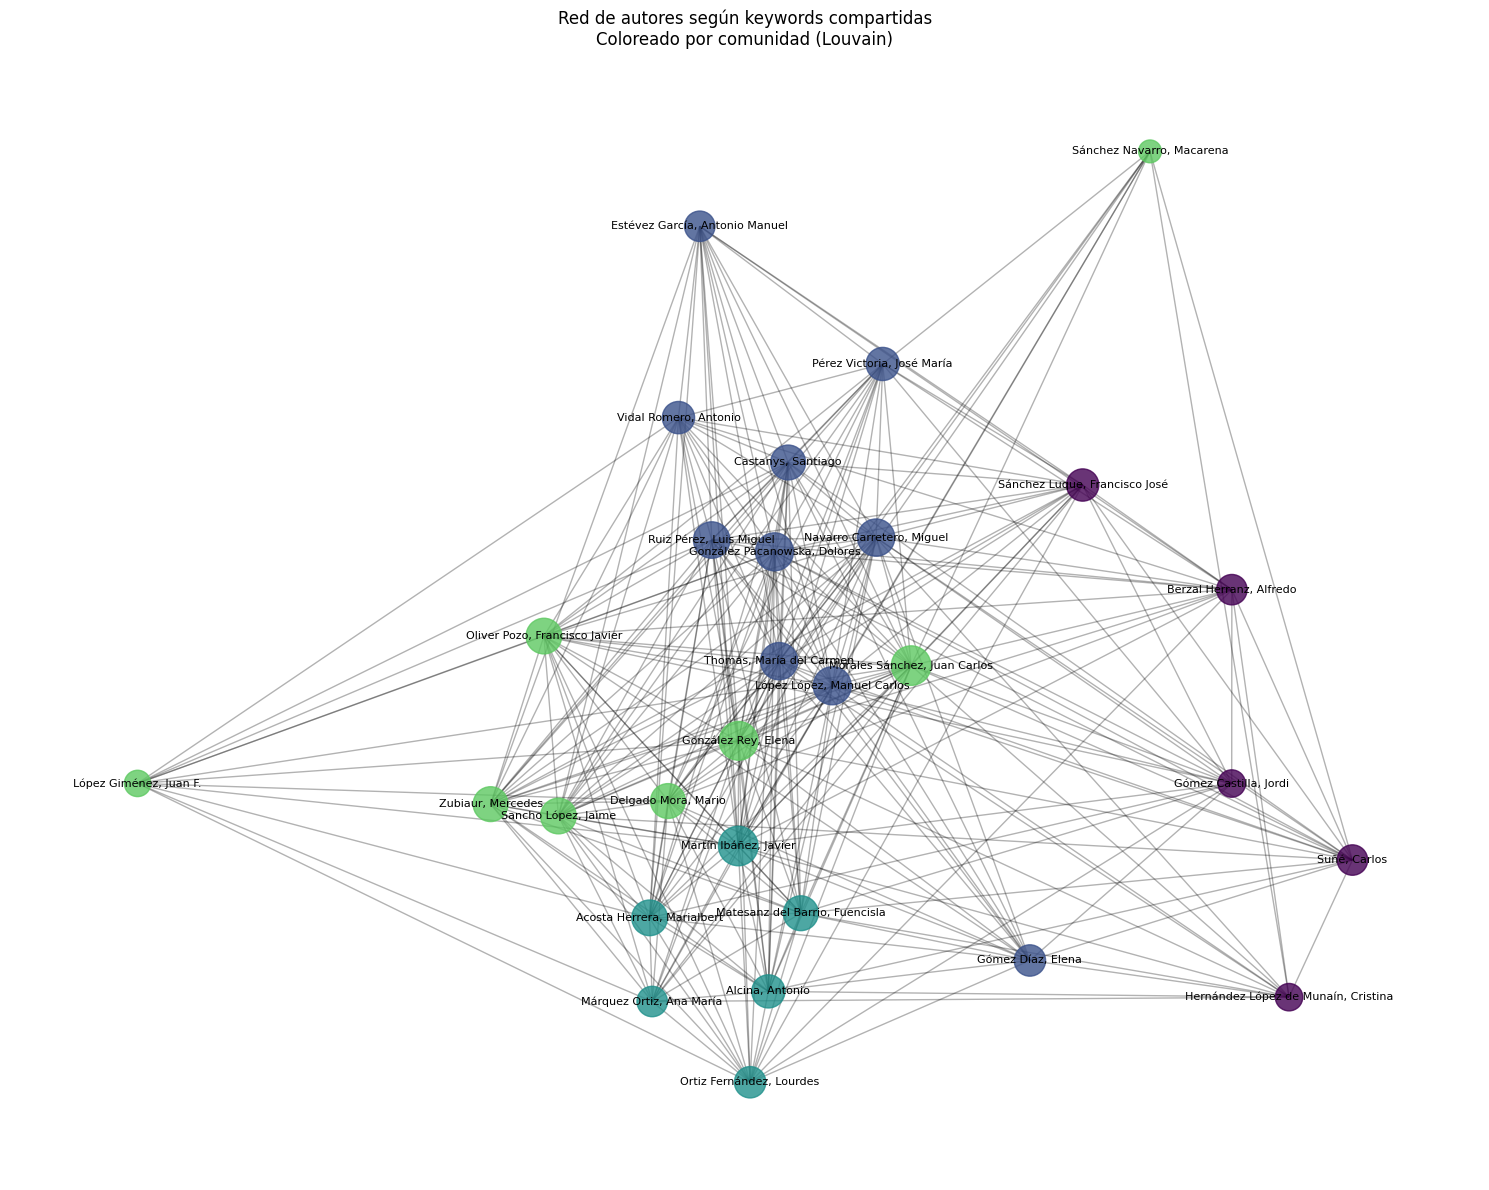

Número de nodos (autores): 29
Número de enlaces (autores con keywords compartidas): 285
Número de comunidades detectadas por Louvain: 4
Modularidad de la partición Louvain: 0.3697


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain

# Cargar el dataset
df = pd.read_csv("Keywords/author_keyword_matrix.csv", index_col=0)

# Transponer para tener keywords como filas
keyword_matrix = df.fillna(0)

# Crear grafo vacío
G = nx.Graph()

# Añadir nodos (autores)
for author in keyword_matrix.index:
    G.add_node(author)

# Calcular similitud entre pares de autores (keywords compartidas)
authors = keyword_matrix.index.tolist()

for i, author1 in enumerate(authors):
    for j in range(i + 1, len(authors)):
        author2 = authors[j]
        # Dos opciones: número de keywords compartidas o suma de ocurrencias compartidas
        shared_keywords = (keyword_matrix.loc[author1] > 0) & (keyword_matrix.loc[author2] > 0)
        weight = (keyword_matrix.loc[author1][shared_keywords] + keyword_matrix.loc[author2][shared_keywords]).sum()

        if weight > 0:
            G.add_edge(author1, author2, weight=weight)

# Aplicar Louvain
partition = community_louvain.best_partition(G, weight='weight')
modularity = community_louvain.modularity(partition, G, weight='weight')
print(f"Modularidad de la partición Louvain: {modularity:.4f}")

# Visualización
pos = nx.spring_layout(G, seed=42)
cmap = plt.get_cmap('viridis')
unique_communities = list(set(partition.values()))
color_map = {com: cmap(i / len(unique_communities)) for i, com in enumerate(unique_communities)}

# Dibujar nodos con colores según comunidad
node_colors = [color_map[partition[node]] for node in G.nodes()]
node_sizes = [G.degree(node) * 30 for node in G.nodes()]

plt.figure(figsize=(15, 12))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title("Red de autores según keywords compartidas\nColoreado por comunidad (Louvain)")
plt.axis('off')
plt.tight_layout()
plt.show()

# Mostrar estadísticas básicas
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
num_communities = len(set(partition.values()))

print(f"Número de nodos (autores): {num_nodes}")
print(f"Número de enlaces (autores con keywords compartidas): {num_edges}")
print(f"Número de comunidades detectadas por Louvain: {num_communities}")
print(f"Modularidad de la partición Louvain: {modularity:.4f}")


In [16]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
import igraph as ig
import leidenalg as la
from networkx.algorithms.community import (
    greedy_modularity_communities,
    girvan_newman,
    asyn_lpa_communities,
)
from itertools import islice
from collections import defaultdict

# ---------- CARGAR DATOS ----------
df = pd.read_csv("Keywords/author_keyword_matrix.csv", index_col=0)
keyword_matrix = df.fillna(0)
G = nx.Graph()

# Añadir nodos y crear aristas ponderadas
for author in keyword_matrix.index:
    G.add_node(author)

authors = keyword_matrix.index.tolist()

for i, a1 in enumerate(authors):
    for j in range(i + 1, len(authors)):
        a2 = authors[j]
        shared = (keyword_matrix.loc[a1] > 0) & (keyword_matrix.loc[a2] > 0)
        weight = (keyword_matrix.loc[a1][shared] + keyword_matrix.loc[a2][shared]).sum()
        if weight > 0:
            G.add_edge(a1, a2, weight=weight)

pos = nx.spring_layout(G, seed=42)

# ---------- FUNCIÓN DE VISUALIZACIÓN ----------
def visualizar_comunidades(G, communities_dict, nombre_algoritmo):
    import matplotlib.cm as cm
    import matplotlib

    unique_coms = list(set(communities_dict.values()))
    color_map = {com: matplotlib.colormaps.get_cmap('viridis')(i / len(unique_coms)) for i, com in enumerate(unique_coms)}
    node_colors = [color_map[communities_dict[n]] for n in G.nodes()]
    node_sizes = [G.degree(n) * 30 for n in G.nodes()]

    plt.figure(figsize=(15, 12))
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, alpha=0.3)
    nx.draw_networkx_labels(G, pos, font_size=8)
    plt.title(f"Red de autores\nColoreado por comunidad ({nombre_algoritmo})")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# ---------- RESUMEN GENERAL ----------
print(f"Número total de nodos: {G.number_of_nodes()}")
print(f"Número total de enlaces: {G.number_of_edges()}")

Número total de nodos: 29
Número total de enlaces: 285


[Louvain] Comunidades: 4 | Modularidad: 0.3697


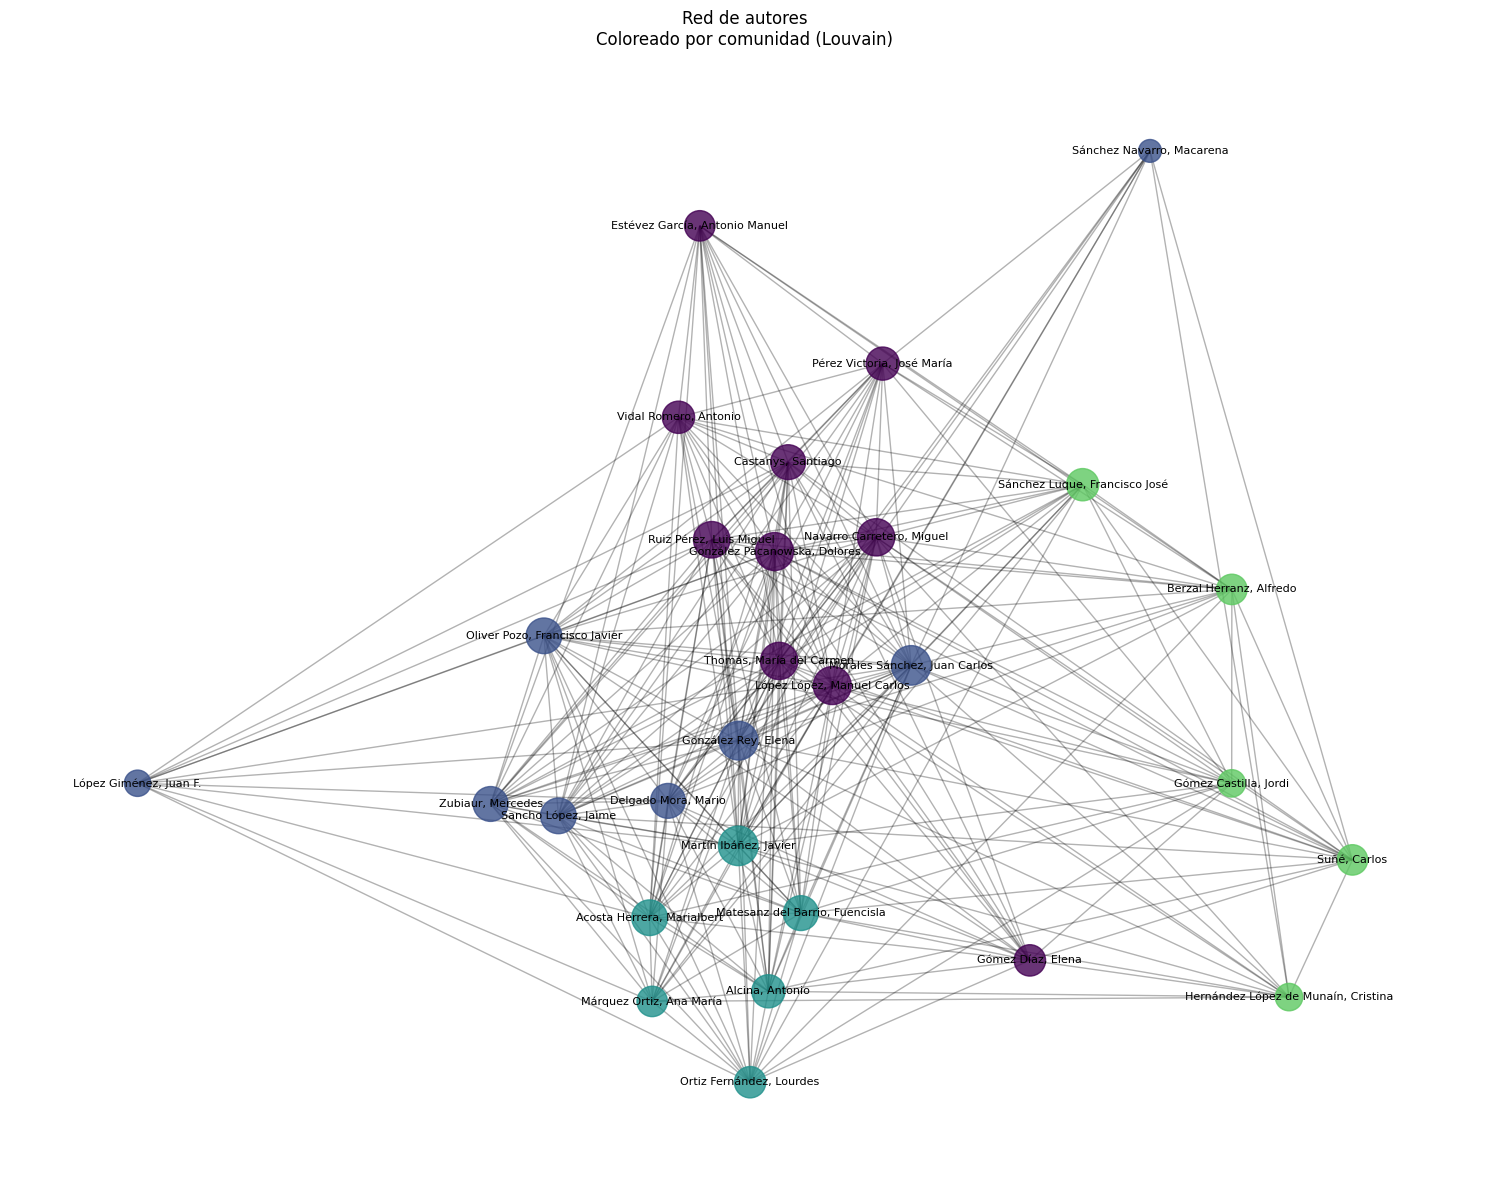

{'Sánchez Navarro, Macarena': 1, 'López López, Manuel Carlos': 0, 'Thomas, María del Carmen': 0, 'González Rey, Elena': 1, 'Delgado Mora, Mario': 1, 'Pérez Victoria, José María': 0, 'Morales Sánchez, Juan Carlos': 1, 'Martín Ibáñez, Javier': 2, 'Hernández López de Munaín, Cristina': 3, 'Suñé, Carlos': 3, 'Castanys, Santiago': 0, 'Matesanz del Barrio, Fuencisla': 2, 'Alcina, Antonio': 2, 'González Pacanowska, Dolores': 0, 'Ruiz Pérez, Luis Miguel': 0, 'Navarro Carretero, Miguel': 0, 'Estévez García, Antonio Manuel': 0, 'Acosta Herrera, Marialbert': 2, 'Vidal Romero, Antonio': 0, 'López Giménez, Juan F.': 1, 'Oliver Pozo, Francisco Javier': 1, 'Gómez Díaz, Elena': 0, 'Zubiaur, Mercedes': 1, 'Sánchez Luque, Francisco José': 3, 'Sancho López, Jaime': 1, 'Berzal Herranz, Alfredo': 3, 'Gómez Castilla, Jordi': 3, 'Ortiz Fernández, Lourdes': 2, 'Márquez Ortiz, Ana María': 2}


In [23]:
# ---------- LOUVAIN ----------
partition_louvain = community_louvain.best_partition(G, weight='weight')
modularity_louvain = community_louvain.modularity(partition_louvain, G, weight='weight')
print(f"[Louvain] Comunidades: {len(set(partition_louvain.values()))} | Modularidad: {modularity_louvain:.4f}")
visualizar_comunidades(G, partition_louvain, "Louvain")

print(partition_louvain)

[Leiden] Comunidades: 4 | Modularidad: 0.0230


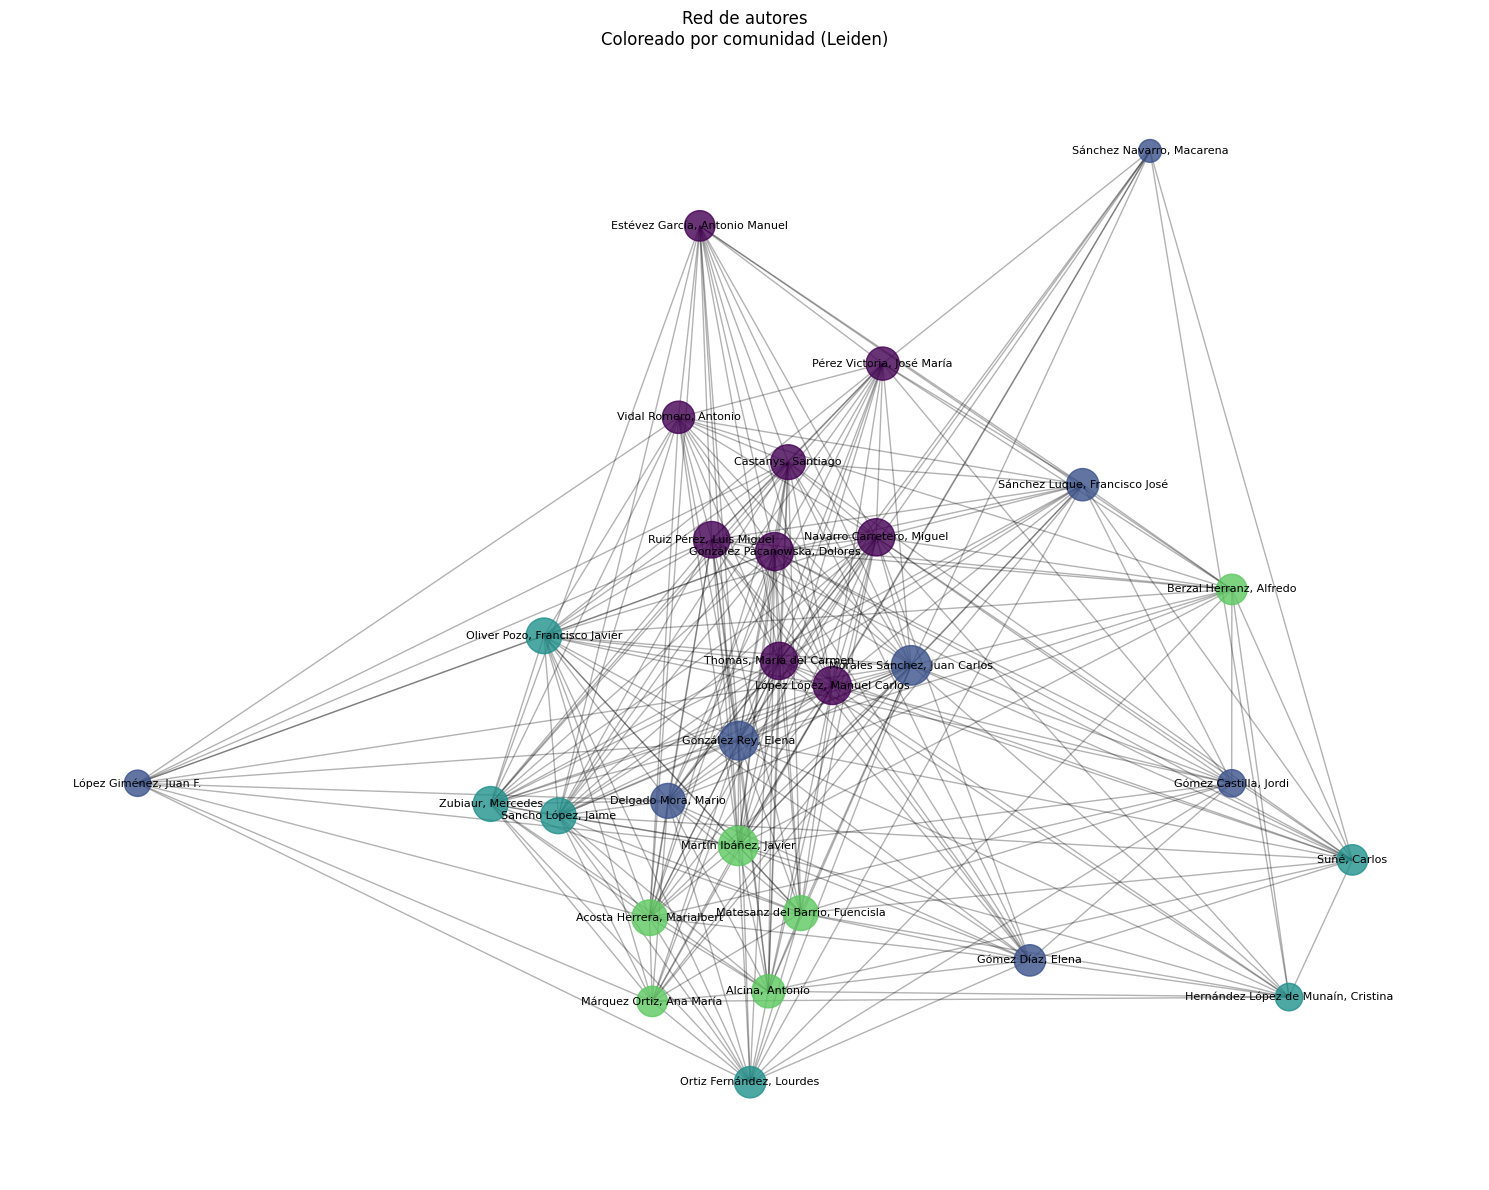

In [19]:
# ---------- LEIDEN ----------
g_ig = ig.Graph.TupleList(
    [(u, v, d['weight']) for u, v, d in G.edges(data=True)],
    edge_attrs=['weight'],
    directed=False
)
g_ig.vs['name'] = list(G.nodes())
leiden_partition = la.find_partition(g_ig, la.ModularityVertexPartition, weights=g_ig.es["weight"])
partition_leiden = {g_ig.vs[v]['name']: cid for cid, com in enumerate(leiden_partition) for v in com}
modularity_leiden = leiden_partition.modularity
print(f"[Leiden] Comunidades: {len(leiden_partition)} | Modularidad: {modularity_leiden:.4f}")
visualizar_comunidades(G, partition_leiden, "Leiden")

[Greedy] Comunidades: 4 | Modularidad: 0.3697


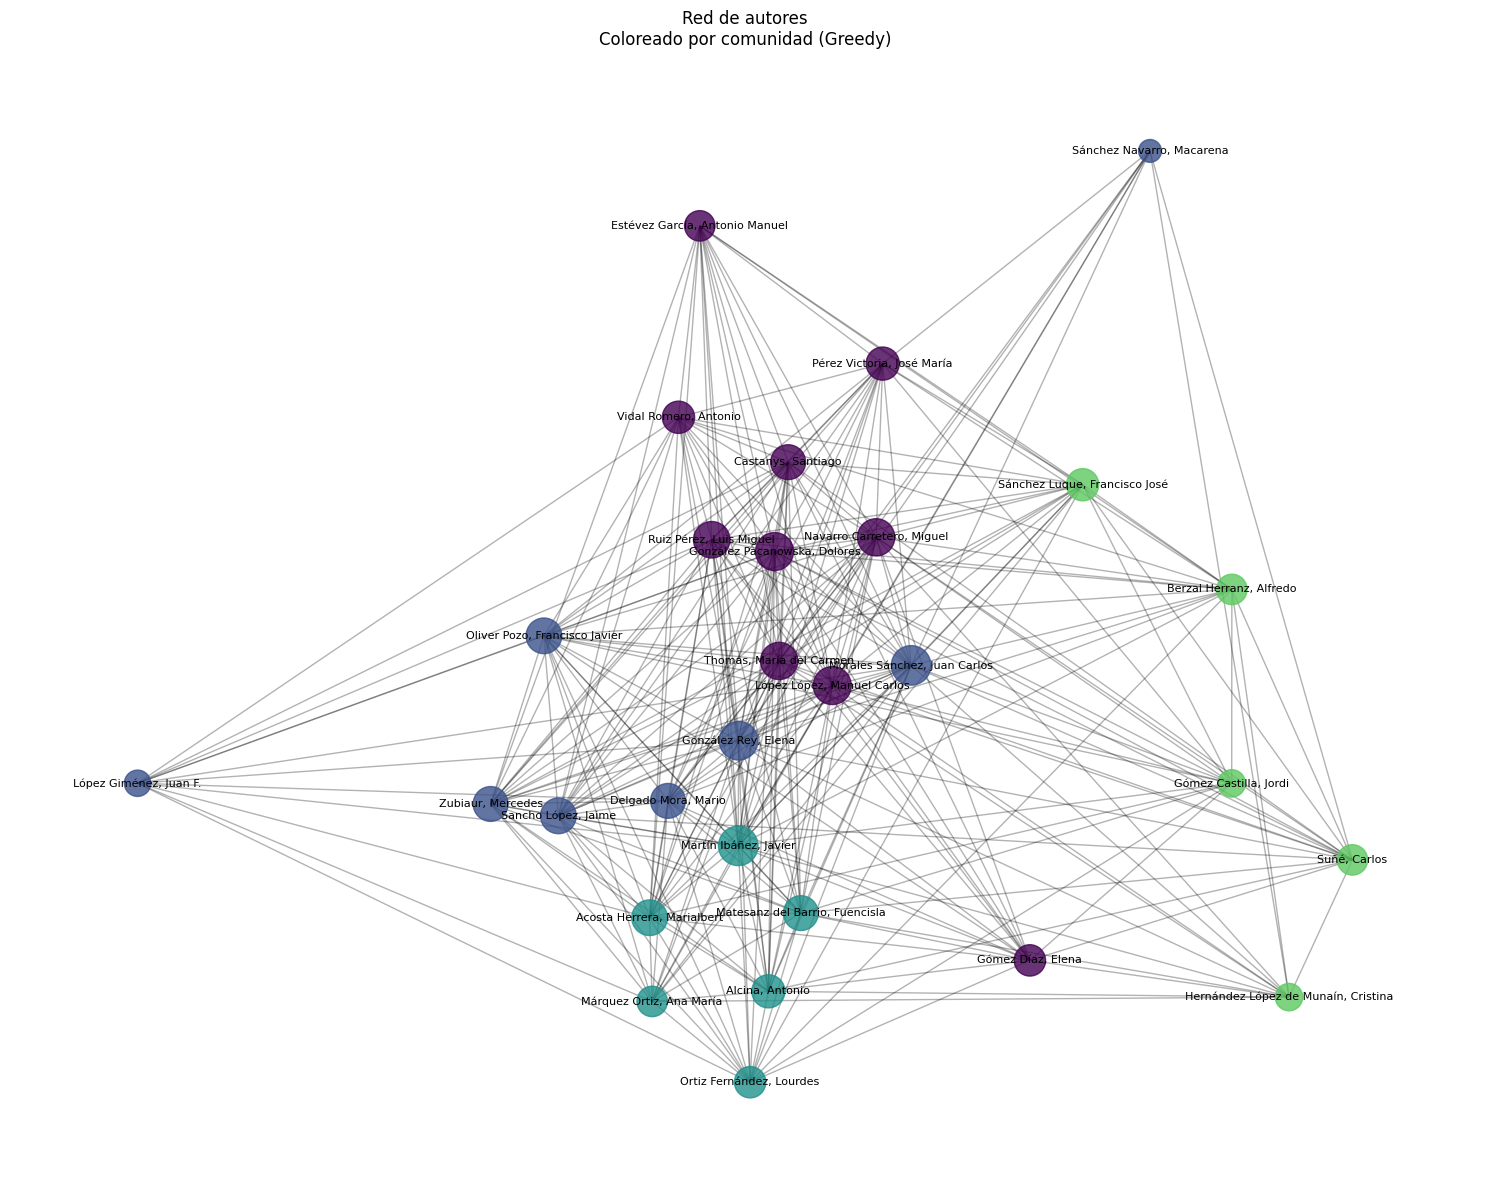

In [20]:
# ---------- GREEDY ----------
greedy_coms = list(greedy_modularity_communities(G, weight='weight'))
partition_greedy = {n: i for i, com in enumerate(greedy_coms) for n in com}
modularity_greedy = community_louvain.modularity(partition_greedy, G, weight='weight')
print(f"[Greedy] Comunidades: {len(greedy_coms)} | Modularidad: {modularity_greedy:.4f}")
visualizar_comunidades(G, partition_greedy, "Greedy")

[Girvan-Newman] Comunidades: 3 | Modularidad: -0.0002


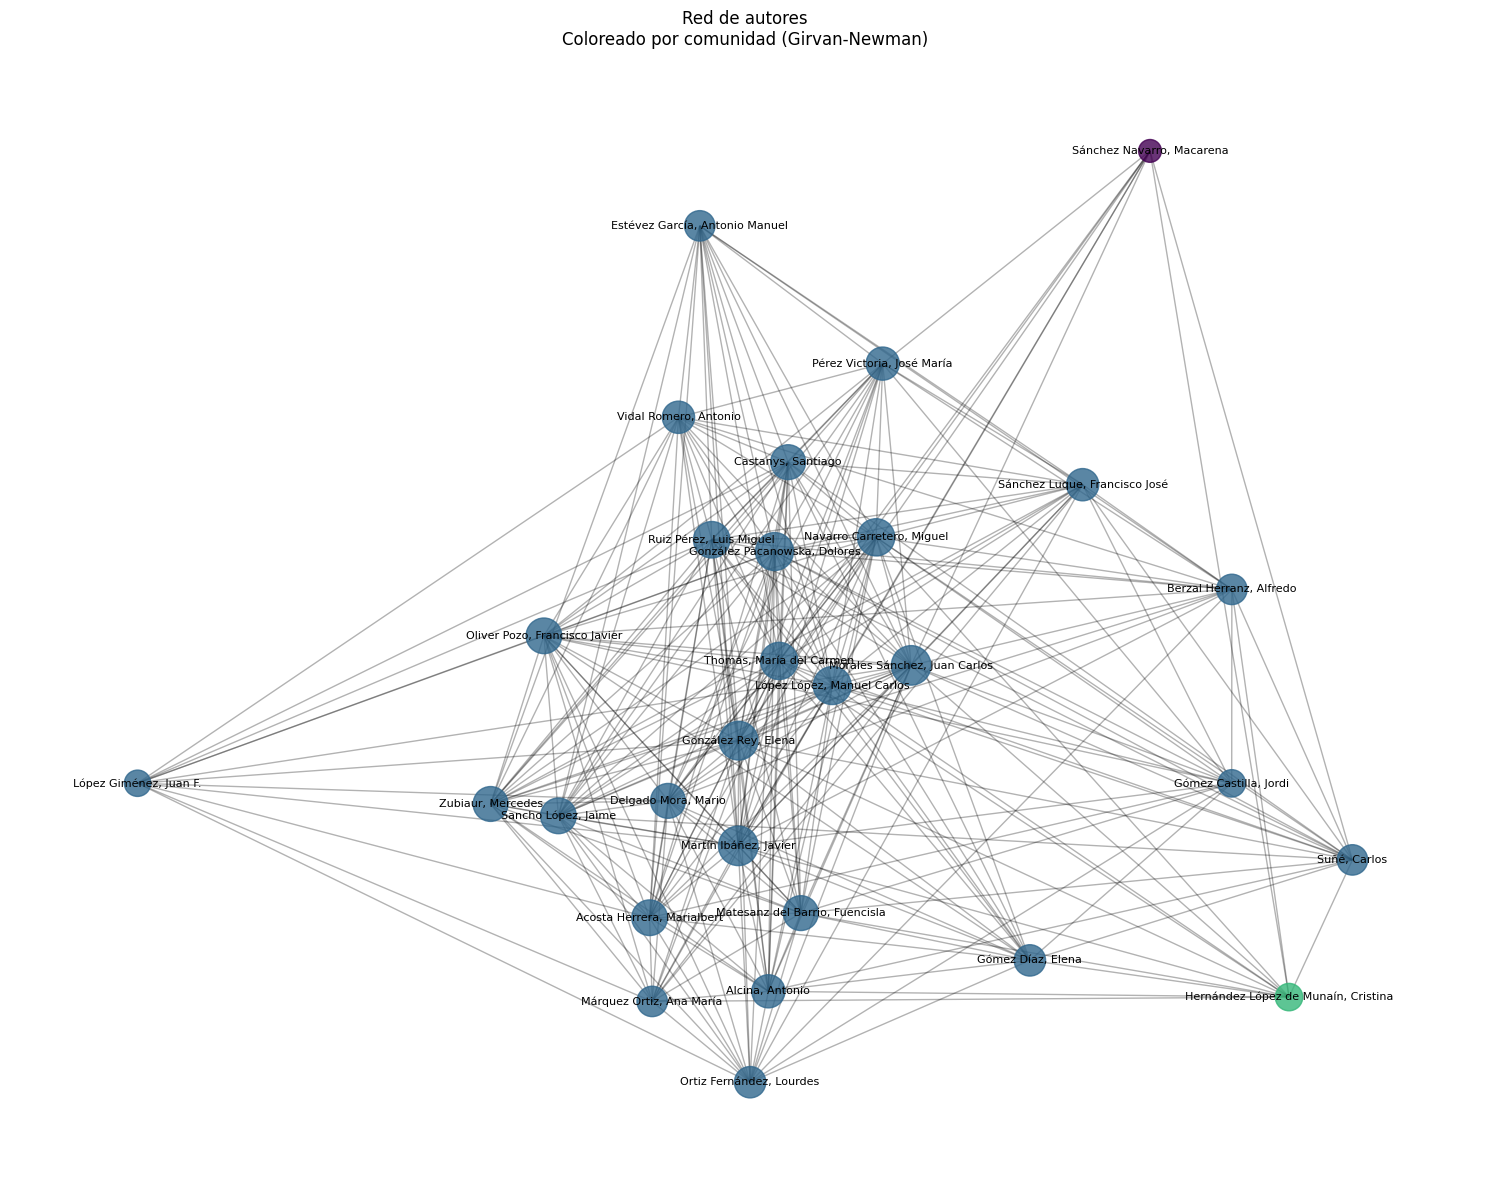

In [21]:
# ---------- GIRVAN-NEWMAN ----------
girvan_gen = girvan_newman(G)
girvan_coms = next(islice(girvan_gen, 1, None))  # Primera partición (2 comunidades)
partition_girvan = {n: i for i, com in enumerate(girvan_coms) for n in com}
modularity_girvan = community_louvain.modularity(partition_girvan, G, weight='weight')
print(f"[Girvan-Newman] Comunidades: {len(girvan_coms)} | Modularidad: {modularity_girvan:.4f}")
visualizar_comunidades(G, partition_girvan, "Girvan-Newman")

[Label Propagation] Comunidades: 1 | Modularidad: 0.0000


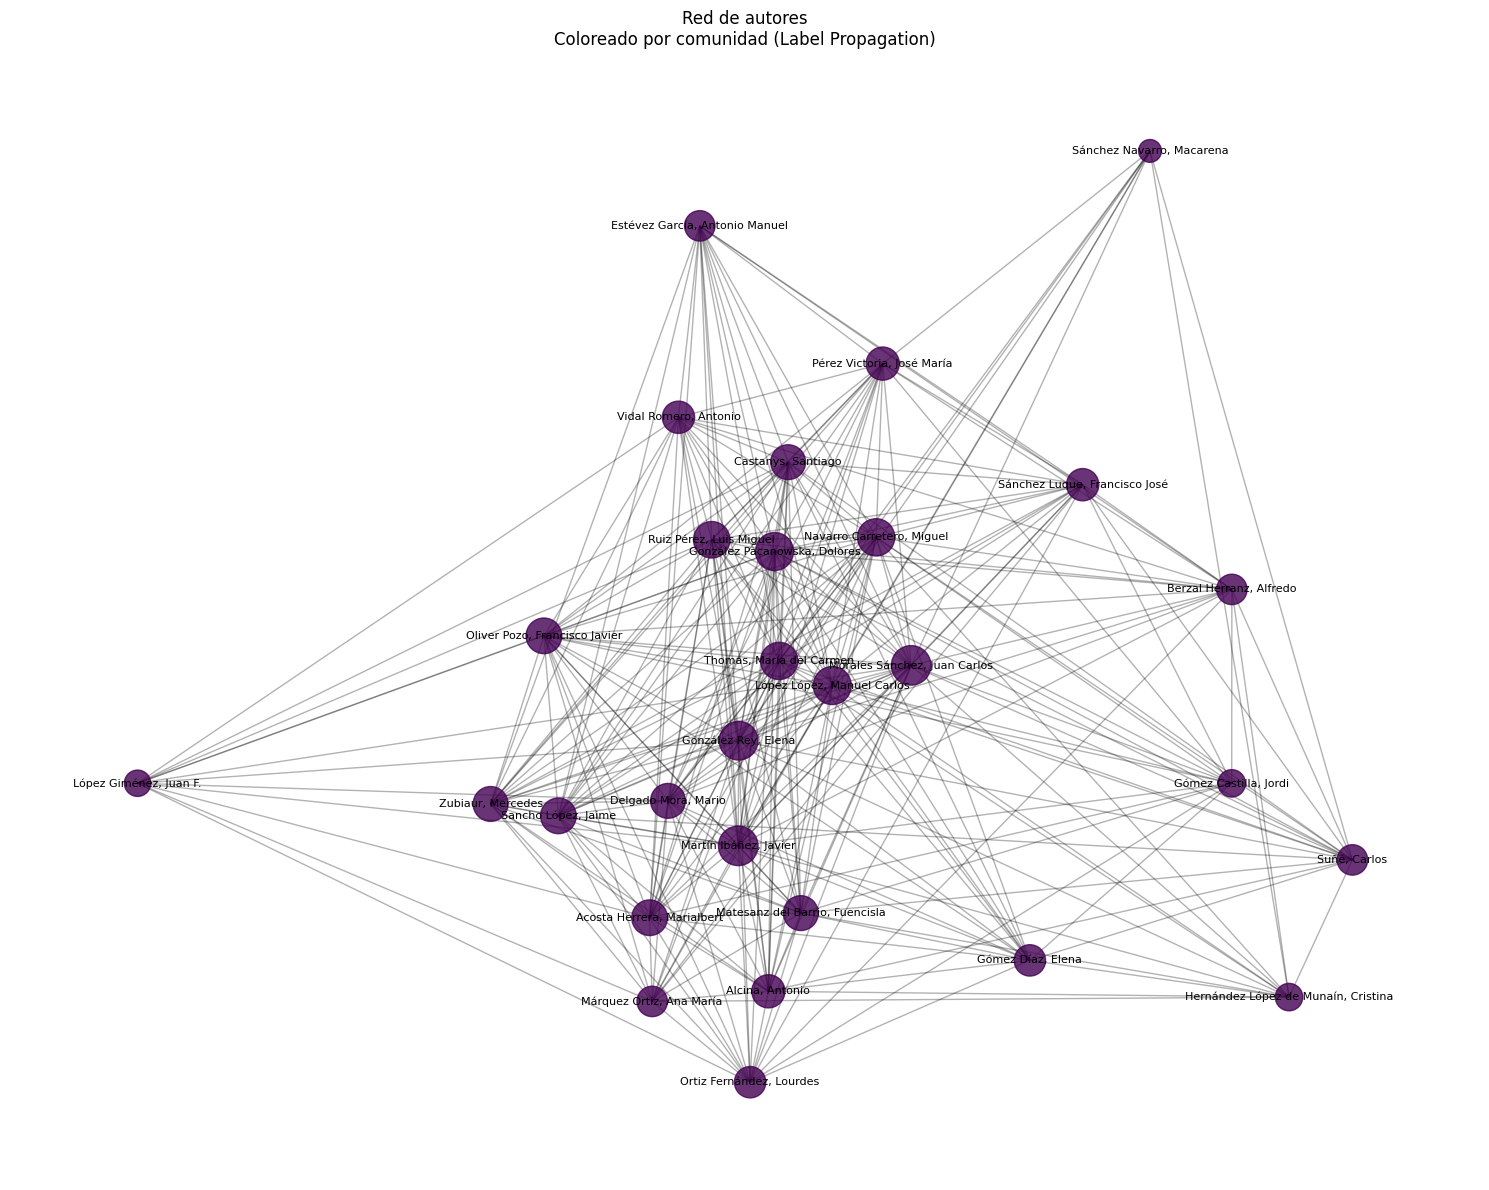

In [22]:
# ---------- LABEL PROPAGATION ----------
label_coms = list(asyn_lpa_communities(G))
partition_label = {n: i for i, com in enumerate(label_coms) for n in com}
modularity_label = community_louvain.modularity(partition_label, G, weight='weight')
print(f"[Label Propagation] Comunidades: {len(label_coms)} | Modularidad: {modularity_label:.4f}")
visualizar_comunidades(G, partition_label, "Label Propagation")


In [24]:
# Guardamos los resultados de Lovaina
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

df = pd.read_csv("Keywords/author_keyword_matrix.csv", index_col=0)

X = df.values
X_normalized = Normalizer().fit_transform(X)
X = PCA(n_components=2).fit_transform(X_normalized)

labels = [partition_louvain[a] for a in df.index]  # df: contiene los autores en orden

from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

sil = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

k = len(set(labels))

df_louvain = pd.DataFrame({
    'author': df.index,
    'cluster': labels,
    'k': k,
    'pca_dims': X.shape[1],
    'silhouette': sil,
    'calinski_harabasz': calinski,
    'davies_bouldin': davies,
    'modularity': modularity_louvain
})

pd.DataFrame(df_louvain).to_csv("Keywords/Lovaina/lovain_best_configs.csv", index=False)